In [1]:
import numpy as np 
import  pandas as pd 
import mglearn
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y=make_blobs(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression().fit(X_train,y_train)
print("test score: {:.3f}".format(logreg.score(X_test,y_test)))

test score: 0.880


# Cross Validation


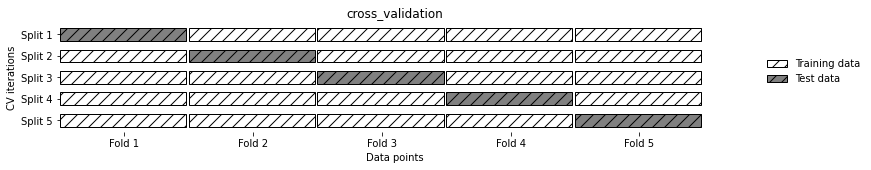

In [5]:
mglearn.plots.plot_cross_validation()

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris=load_iris()
logreg=LogisticRegression()
scores=cross_val_score(logreg,iris.data,iris.target)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [9]:
print("Average cross validation score:{:.2f}".format(scores.mean()))

Average cross validation score:0.97


## Stratified k-Fold Cross-Validation and Other Strategies


In [10]:
from sklearn.datasets import load_iris
iris=load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


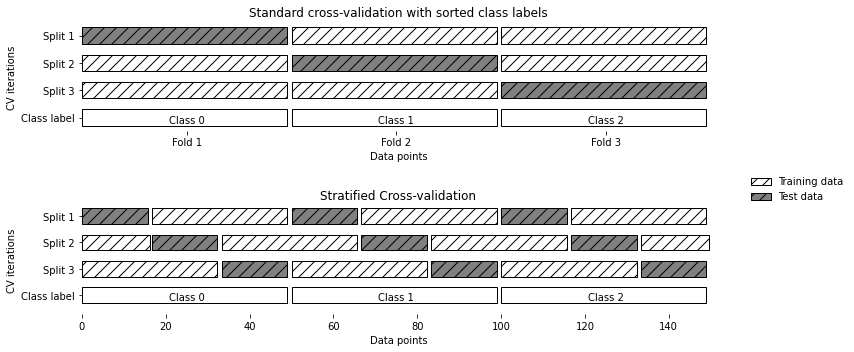

In [11]:
mglearn.plots.plot_stratified_cross_validation()

In [12]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
print("Cross-validation scores\n:{}".format(cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores
:[1.         1.         0.86666667 0.93333333 0.83333333]


In [13]:
kfold=KFold(n_splits=3)
print("Cross-validation scores\n:{}".format(cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores
:[0. 0. 0.]


In [15]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [16]:
# Leave-one-out cross-validation
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(logreg,iris.data,iris.target,cv=loo)
print("number of cv iterations: ",len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

number of cv iterations:  150
Mean accuracy: 0.97


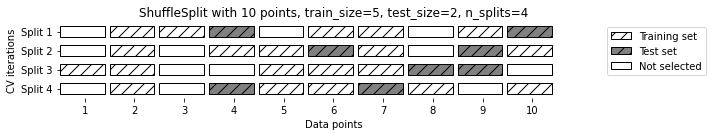

In [17]:
# Shuffle-split cross-validation
mglearn.plots.plot_shuffle_split()

In [18]:
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=0.5,train_size=0.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.93333333 0.97333333 0.97333333 0.98666667 0.97333333 0.97333333
 0.96       0.97333333 0.96       0.93333333]


In [20]:
# Cross-validation with groups
from sklearn.model_selection import GroupKFold
X,y=make_blobs(n_samples=12,random_state=0)
groups=[0,0,0,1,1,1,1,2,2,3,3,3]
scores=cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


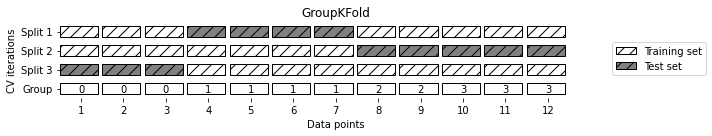

In [22]:
mglearn.plots.plot_group_kfold()

# Grid Search 

## Simple Grid Search

In [29]:
# naive grid search implementation
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0],X_test.shape[0]))

scores=[]
gamma_function=[]
C_function=[]
best_score=0

for gamma in [0.001,0.01,0.1,1,100]:
    for C in [0.001,0.01,0.1,1,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)
        scores.append(score)
        gamma_function.append(gamma)
        C_function.append(C)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

print("Best Score: {:.2f}".format(best_score))
print("Best Parametres: {}".format(best_parameters))

df_test=pd.DataFrame(C_function,columns=['C'])
df_test['gamma']=gamma_function
df_test['score']=scores

df_test.head()

Size of training set: 112 size of test set: 38
Best Score: 0.97
Best Parametres: {'C': 100, 'gamma': 0.001}


,C,gamma,score
0,0.001,0.001,0.236842
1,0.010,0.001,0.236842
2,0.100,0.001,0.236842
3,1.000,0.001,0.578947
4,100.000,0.001,0.973684


In [34]:
## The danger of overfitting the parameters and the validation set
from sklearn.svm import SVC
# Split data into Validation Set and Testing set 
X_trainval,X_test,y_trainval,y_test=train_test_split(iris.data,iris.target, random_state=0)

X_train,X_val,y_train,y_val=train_test_split(X_trainval,y_trainval,random_state=1)
print("Size of training set: {} size of validation set: {} size of testing set: {}".format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))


scores=[]
gamma_function=[]
C_function=[]
best_score=0

for gamma in [0.001,0.01,0.1,1,100]:
    for C in [0.001,0.01,0.1,1,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_val,y_val)
        scores.append(score)
        gamma_function.append(gamma)
        C_function.append(C)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

print("Validation Best Score: {:.2f}".format(best_score))
print("Best Parametres: {}".format(best_parameters))

df_val=pd.DataFrame(C_function,columns=['C'])
df_val['gamma']=gamma_function
df_val['score']=scores


svm=SVC(**best_parameters)
print("test score: {:.2f}".format(svm.fit(X_trainval,y_trainval).score(X_test,y_test)))

Size of training set: 84 size of validation set: 28 size of testing set: 38
Validation Best Score: 0.96
Best Parametres: {'C': 1, 'gamma': 0.01}
test score: 0.92


## Grid Search with Cross-validation

In [37]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
print("Best parameters: ",best_parameters)
print("test score :{:.3f}".format(svm.score(X_test,y_test)))

Best parameters:  {'C': 10, 'gamma': 0.1}
test score :0.974


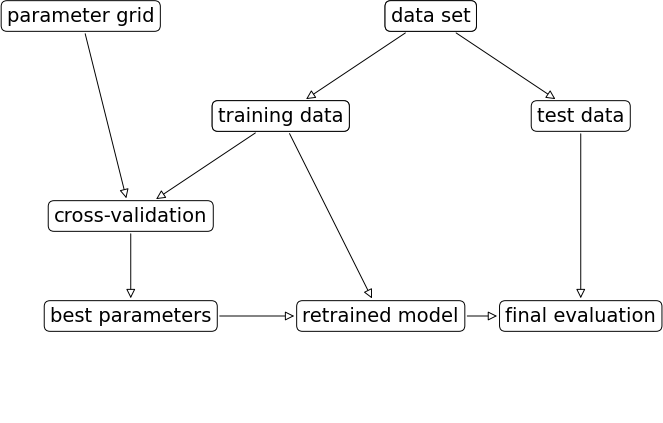

In [40]:
mglearn.plots.plot_grid_search_overview()

In [41]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
print("Paramter grid:\n{}".format(param_grid))

Paramter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=10)
from sklearn.datasets import load_digits
digits=load_digits()

X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)

In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [44]:
print("test set score: {:.2f}".format(grid_search.score(X_test,y_test)))

test set score: 0.99


In [45]:
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Cross-validation score:{}".format(grid_search.best_score_))

Best Parameters: {'C': 10, 'gamma': 0.001}
Best Cross-validation score:0.9910889994472084


In [46]:
print("best estimater:\n{}".format(grid_search.best_estimator_))

best estimater:
SVC(C=10, gamma=0.001)


In [47]:
# Analyzing the result of cross-validation
results=pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.333849,0.019301,0.019481,0.001733,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.103704,0.103704,0.111111,0.111111,0.111111,0.103704,0.103704,0.104478,0.104478,0.104478,0.106158,0.003258,12
1,0.346414,0.036221,0.019781,0.001224,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.103704,0.103704,0.111111,0.111111,0.111111,0.103704,0.103704,0.104478,0.104478,0.104478,0.106158,0.003258,12
2,0.370690,0.045903,0.021326,0.002893,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.103704,0.103704,0.111111,0.111111,0.111111,0.103704,0.103704,0.104478,0.104478,0.104478,0.106158,0.003258,12
3,0.369412,0.028117,0.021608,0.001057,0.001,1,"{'C': 0.001, 'gamma': 1}",0.103704,0.103704,0.111111,0.111111,0.111111,0.103704,0.103704,0.104478,0.104478,0.104478,0.106158,0.003258,12
4,0.333754,0.017215,0.020777,0.001283,0.001,10,"{'C': 0.001, 'gamma': 10}",0.103704,0.103704,0.111111,0.111111,0.111111,0.103704,0.103704,0.104478,0.104478,0.104478,0.106158,0.003258,12


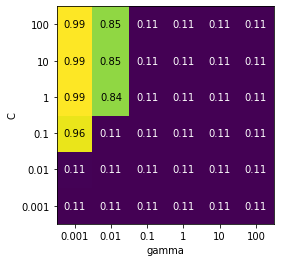

In [50]:
scores=np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap='viridis')

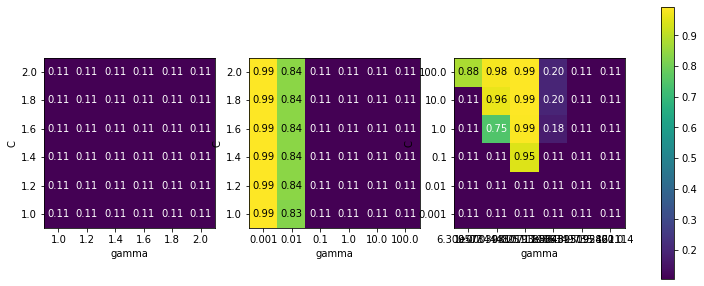

In [52]:
fig, axes=plt.subplots(1,3 ,figsize=(13,5))
param_grid_linear={'C':np.linspace(1,2,6),'gamma':np.linspace(1,2,6)}
param_grid_one_log={'C':np.linspace(1,2,6),'gamma':np.logspace(-3,2,6)}
param_grid_range={'C':np.logspace(-3,2,6),'gamma':np.logspace(-7,2,6)}

for param_grid, ax in zip([param_grid_linear,param_grid_one_log,param_grid_range],axes):
    grid_search=GridSearchCV(SVC(),param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores=grid_search.cv_results_['mean_test_score'].reshape(6,6)

    scores_image=mglearn.tools.heatmap(scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],yticklabels=param_grid['C'],cmap='viridis',ax=ax)


plt.colorbar(scores_image,ax=axes.tolist())

## Search over spaces that are not grids

In [53]:

param_grid = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [54]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.99


In [55]:
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.312693,0.278182,0.27774,0.293584,0.273959,0.271117,0.26835,0.281402,0.324594,0.316503,...,0.301821,0.317099,0.293245,0.295571,0.0371294,0.0337887,0.0344613,0.0339671,0.0336414,0.0356009
std_fit_time,0.0105303,0.00950525,0.00623891,0.0130696,0.0184357,0.00811038,0.00715516,0.0101294,0.0191858,0.0188556,...,0.00363186,0.00193519,0.00162497,0.00301697,0.0013682,0.000804091,0.0012406,0.000901078,0.000402808,0.00163826
mean_score_time,0.0409626,0.0377948,0.0405175,0.0385287,0.0495972,0.0374045,0.0358813,0.0373996,0.0392848,0.0401514,...,0.0347151,0.0374626,0.0372021,0.0365709,0.0122392,0.00950499,0.00884957,0.00911074,0.00988154,0.00912895
std_score_time,0.00423814,0.00251412,0.00489335,0.000602247,0.0249325,0.00173525,0.00115534,0.00201407,0.00244719,0.00157978,...,0.000571711,0.00206813,0.00163499,0.000652412,0.000296285,0.00118143,0.000896924,0.000959165,0.00144506,0.000907175
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,...,0.103704,0.103704,0.103704,0.103704,0.97037,0.985185,0.981481,0.981481,0.981481,0.981481
split1_test_score,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,0.103704,...,0.107407,0.103704,0.103704,0.103704,0.985185,0.97037,0.97037,0.97037,0.97037,0.97037


## Nested cross-validation

In [56]:
scores=cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),digits.data,digits.target,cv=5)
print("Cross-validation scores: ",scores)
print("Mean cross-valdation score: ",scores.mean())

Cross-validation scores:  [0.97777778 0.95       0.98328691 0.98607242 0.9637883 ]
Mean cross-valdation score:  0.972185082017951


In [57]:
def nested_cv(X,y,inner_cv,outer_cv,Classifier,parameter_grid):
    outer_scores=[]
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X,y):
        # find best parameter using inner cross-validation
        best_parms={}
        best_score=-np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores=[]
            for inner_train,inner_test in inner_cv.split(X[training_samples],y[training_samples]):
                clf=Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                score=clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            mean_score=np.mean(cv_scores)
            if mean_score>best_score:
                best_score=mean_score
                best_parms=parameters
        clf=Classifier(**best_parms)
        clf.fit(X[training_samples],y[training_samples])
        outer_scores.append(clf.score(X[test_samples],y[test_samples]))
    return np.array(outer_scores)
            

In [58]:
from sklearn.model_selection import ParameterGrid,StratifiedKFold
scores=nested_cv(iris.data,iris.target,StratifiedKFold(5),StratifiedKFold(5),SVC,ParameterGrid(param_grid))

print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
